# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

## Data Validation

This data set has 947 rows and 8 columns:

- recipe: 947 unique integer values with no missing values.  However, since this is a unique identifier of the recipe, I made this the index.  No other cleaning is needed.  
- calories: 895 numeric values with 52 missing values.  Values were missing for eight of the ten categories, so I imputed each category's median for each respective category.  Afterward, there are 947 values with no missing values.  No other cleaning is needed.
- carbohydrate: 895 numeric values with 52 missing values.  Values were missing for eight of the ten categories, so I imputed each category's median for each respective category.  Afterward, there are 947 values with no missing values.  No other cleaning is needed.
- sugar: 895 numeric values with 52 missing values.  Values were missing for eight of the ten categories, so I imputed each category's median for each respective category.  Afterward, there are 947 values with no missing values.  No other cleaning is needed.
- protein: 895 numeric values with 52 missing values.  Values were missing for eight of the ten categories, so I imputed each category's median for each respective category.  Afterward, there are 947 values with no missing values.  No other cleaning is needed.
- category: 947 categorical values with no missing values.  However, the description says there are only supposed to be 10 possible values, but there are 11.  Two of them are similar: 
  - "Chicken"
  - "Chicken Breast"
  According to the description, "Chicken" is the correct value, so I replaced "Chicken Breast" with "Chicken."  I also changed the data type from object to category.  No other cleaning is needed.
- servings: 947 categorical values with no missing values.  However, there were some values that included text:
  - "4 as a snack"
  - "6 as a snack"
  So I removed the text for these values and just kept the numbers, "4" and "6," respectively.  Then I changed the data type to integer.  No other cleaning is needed.
- high_traffic: 574 text values of "High," while the remaining 373 values were null.  According to the description, high traffic recipes would be marked "High," so I can only assume that the null values were recipes that were simply not high traffic, so rather than leave these null, I imputed "Not High" wherever there was a null value.  Afterward, there are 947 text values with no missing values.  Then I changed the data type to category.  No other cleaning is needed.

After cleaning, the data set has 947 rows and 7 columns (with the recipe column becoming the index).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('recipe_site_traffic_2212.csv', index_col='recipe')

In [3]:
# replace null values in target feature
df['high_traffic'] = df['high_traffic'].fillna('Not High').astype('category')

In [4]:
# replace text values in servings feature and change to integer
df['servings'] = df['servings'].replace('4 as a snack', '4')\
                               .replace('6 as a snack', '6')\
                               .astype('int')

In [5]:
# replace "Chicken Breast" with "Chicken" in category column
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

In [6]:
# impute the median for missing values
missing_val_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

for c in missing_val_cols:
    # Create the dict of medians for calories, carbs, sugar, and protein
    median_dict = df.groupby('category')[c].median().to_dict()
    
    # Replace the nulls with the medians
    df[c].fillna(df['category'].map(median_dict), inplace=True)

In [7]:
df['category'] = df['category'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      947 non-null    float64 
 1   carbohydrate  947 non-null    float64 
 2   sugar         947 non-null    float64 
 3   protein       947 non-null    float64 
 4   category      947 non-null    category
 5   servings      947 non-null    int64   
 6   high_traffic  947 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 46.7 KB


In [9]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,399.26,19.56,5.23,29.82,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Not High
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Not High


## Exploratory Analysis

I have explored the target variable and features of each recipe, and the relationship between them.  Changes to enable modeling will be described later.

### Target Variable - High Traffic

Since we need to predict what recipes are high traffic, the high traffic variable would be our target variable.  From the bar plot below, we can see there are 574 high traffic recipes and 373 not-high traffic recipes.

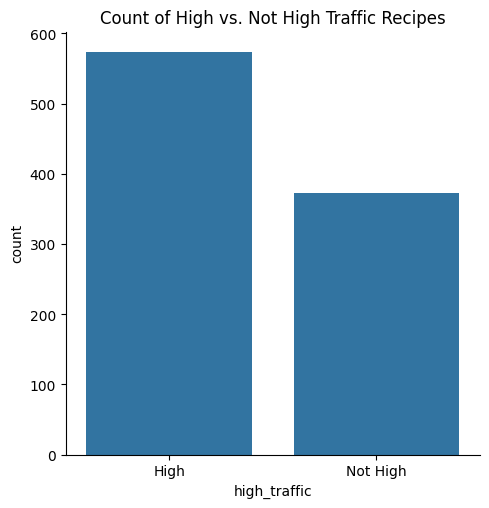

In [10]:
g = sns.catplot(data=df, x='high_traffic', kind='count')\
                .set(title="Count of High vs. Not High Traffic Recipes")

plt.show()

From the chart below, this also means that about 61% of the recipes are high traffic.

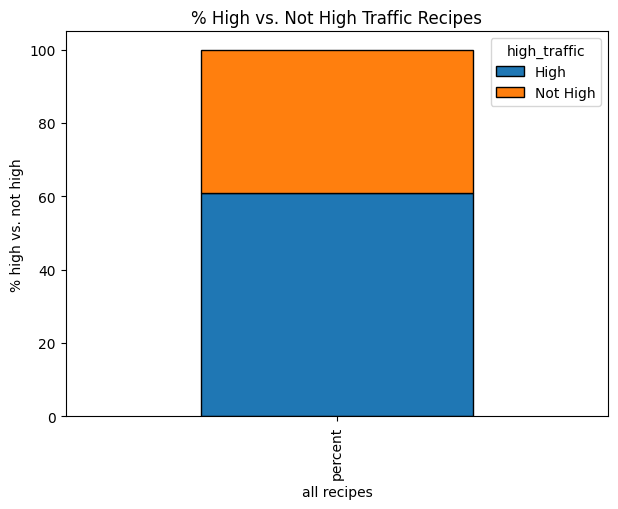

In [11]:
df_prop = (df['high_traffic']
             .value_counts(normalize=True)
             .mul(100)
             .round(0)
             .to_frame()
             .reset_index()
             .rename(columns={'index': 'high_traffic',
                              'high_traffic': 'percent'})
             )

df_prop = pd.pivot_table(df_prop, values='percent', columns=['high_traffic'])

fig, ax = plt.subplots(figsize=(7, 5))

df_prop.plot(kind='bar',
             stacked=True,
             ax=ax,
             width=0.5,
             edgecolor='black')

ax.set(ylabel='% high vs. not high',
       xlabel='all recipes',
       title='% High vs. Not High Traffic Recipes')

plt.show()

## Categorical Variables - Category, High Traffic

Looking the bar chart below, we can see that Chicken recipes are the most common category in the dataset.

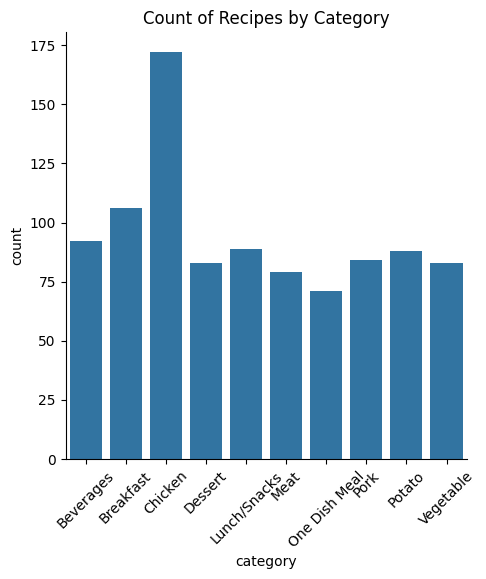

In [12]:
g = sns.catplot(data=df, x='category', kind='count')\
                .set(title="Count of Recipes by Category")

plt.xticks(rotation=45)

plt.show()

When comparing the overall 61% of high traffic recipes to each of the ten categories of recipes in the chart below, we see that seven out of the ten categories have a higher percentage of high traffic recipes than 61%, with the top three being vegetable, potato, and pork, each above 90%.

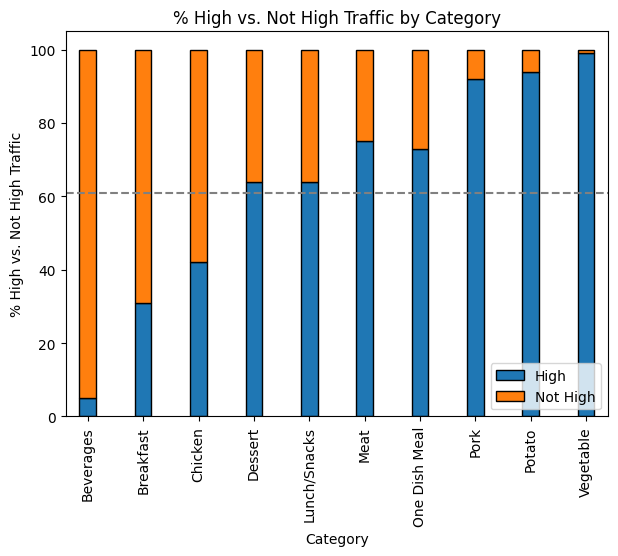

In [13]:
# create chart showing proportion of high traffic recipes by category
df_cat_prop = (df.groupby('category')['high_traffic']
             .value_counts(normalize=True)
             .mul(100)
             .round(0)
             .unstack())

df_cat_prop.sort_values('High', ascending=False)

fig, ax = plt.subplots(figsize=(7, 5))

df_cat_prop.plot(kind='bar',
             stacked=True,
             ax=ax,
             width=0.3,
             edgecolor='black')

ax.set(ylabel='% High vs. Not High Traffic', xlabel='Category',
       title='% High vs. Not High Traffic by Category')

plt.axhline(y=61, color='gray', linestyle='dashed')
plt.legend(loc=4)

plt.show()

## Numeric variables - Calories, Carbohydrate, Sugar, Protein, Servings

From the heatmap below, we can see a weak linear relationship between protein and calories, but the other variables only have very weak or no relationship.

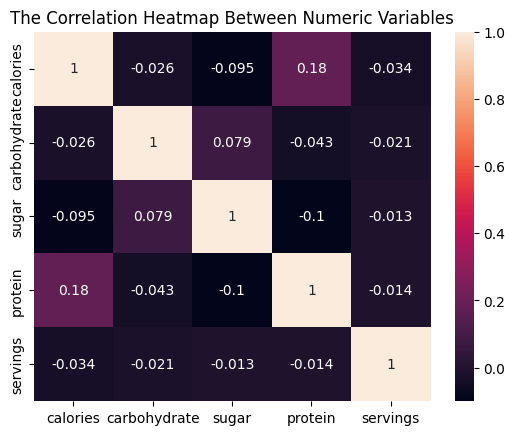

In [14]:
sns.heatmap(df.corr(), annot=True)

plt.title('The Correlation Heatmap Between Numeric Variables')

plt.show()

From the pairplot of contiuous variables below, there may be a non-linear relationship between some variables, such that as one decreases, the other decreases, first sharply, but then more gradually.  Further, there doesn't seem to be anything of note between high traffic and non-high traffic recipes in these charts.

Also, we can see that the continous variables are all right skewed and thus in need of transformation during the machine learning pipeline.

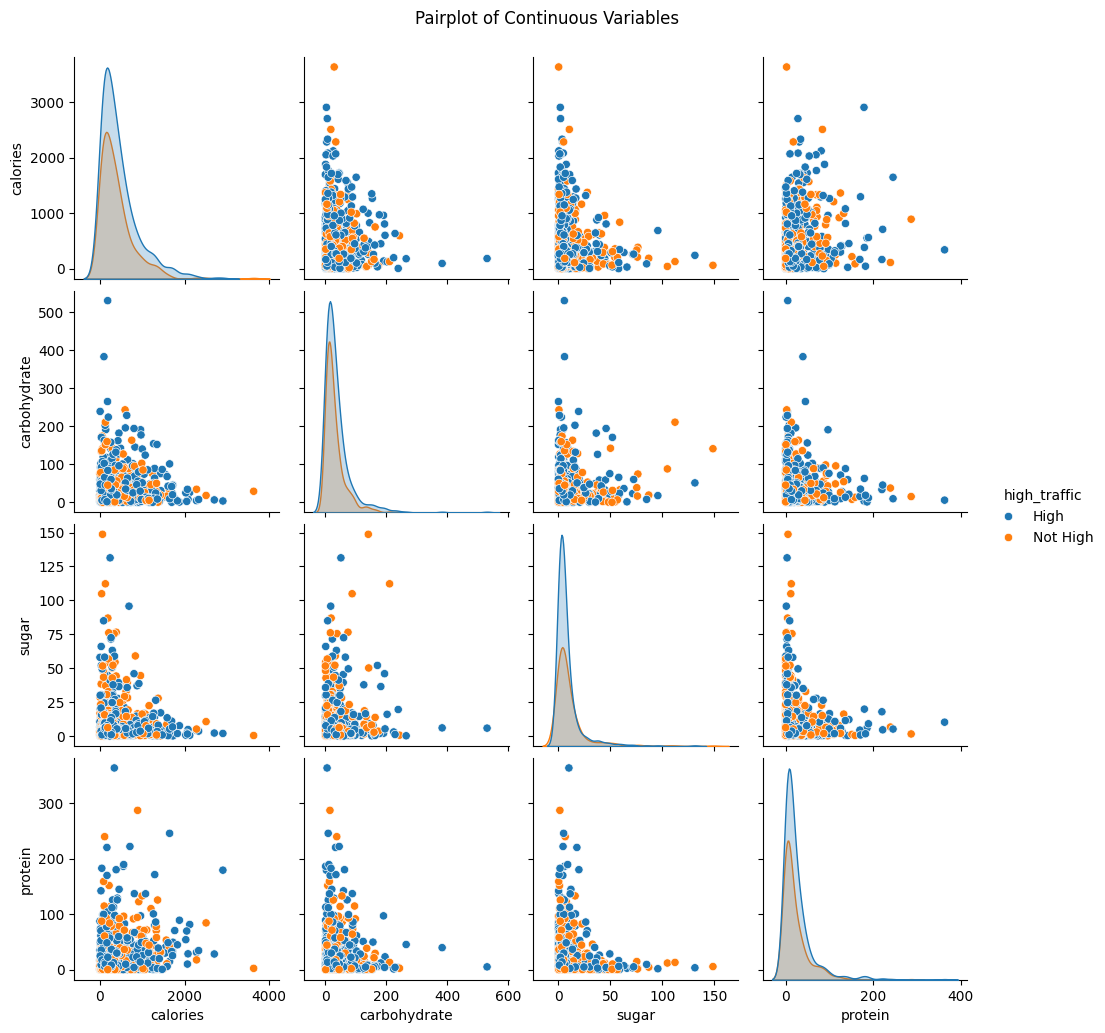

In [15]:
vars = ['calories', 'carbohydrate', 'sugar', 'protein']

g = sns.pairplot(df, vars=vars, hue='high_traffic')

g.fig.suptitle("Pairplot of Continuous Variables", y=1.03)

plt.show()

As we can see in the charts below, applying a power transformation to the continuous variables as part of the pipeline will make them much more normally distributed.

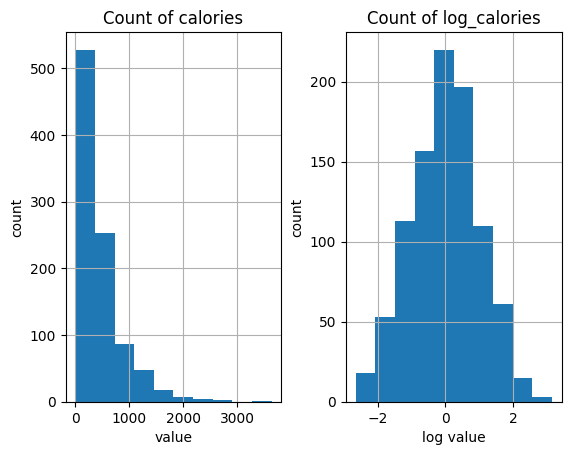

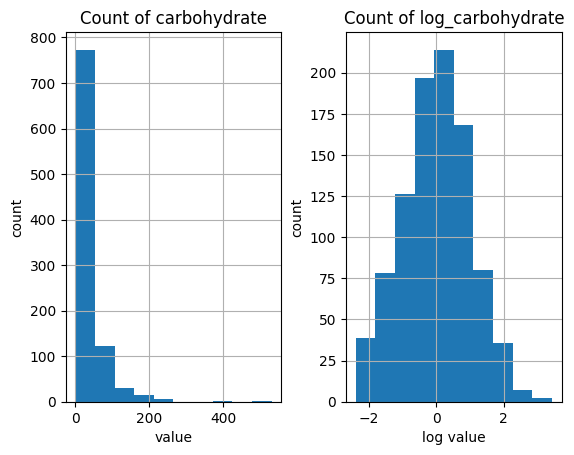

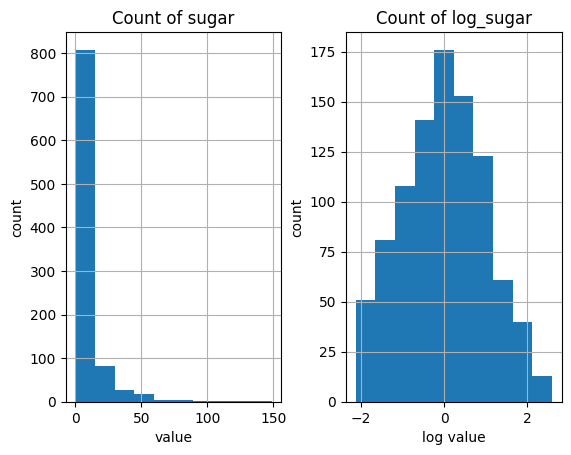

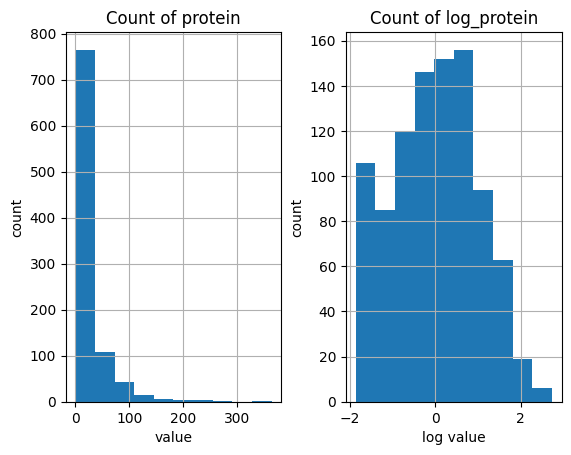

In [16]:
from sklearn.preprocessing import PowerTransformer

vars=['calories', 'carbohydrate', 'sugar', 'protein']

df_log = df.copy(deep=True)

log_vars = []

for v in vars:
    log = PowerTransformer()
    log.fit(df_log[[v]])
    df_log['log_{}'.format(v)] = log.transform(df_log[[v]])
    
    log_vars.append('log_{}'.format(v))

for v, lv in zip(vars, log_vars):
    fig, axes = plt.subplots(1, 2)

    df_log.hist(v, ax=axes[0])
    df_log.hist(lv, ax=axes[1])
    
    axes[0].set(ylabel='count', xlabel='value',
                title='Count of {}'.format(v))
    axes[1].set(ylabel='count', xlabel='log value',
                title='Count of {}'.format(lv))
    
    plt.show()

When looking at these continuous variables by category in the box plots below, we see higher values for certain variables and for certain categories that all seem to make sense, such as higher carbohydrates for potatoes and dessert, and higher protein for meat, pork, and chicken dishes.

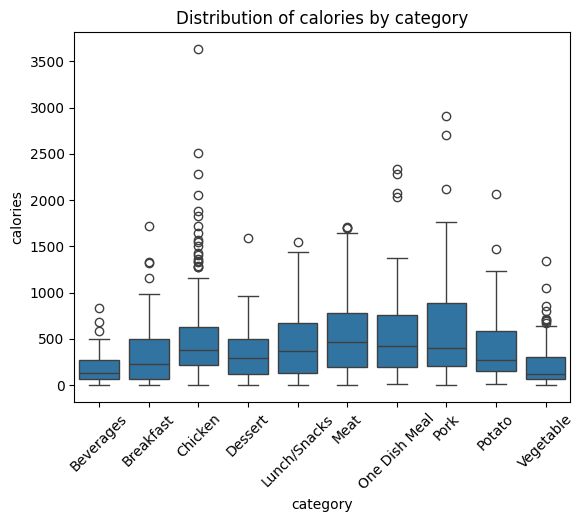

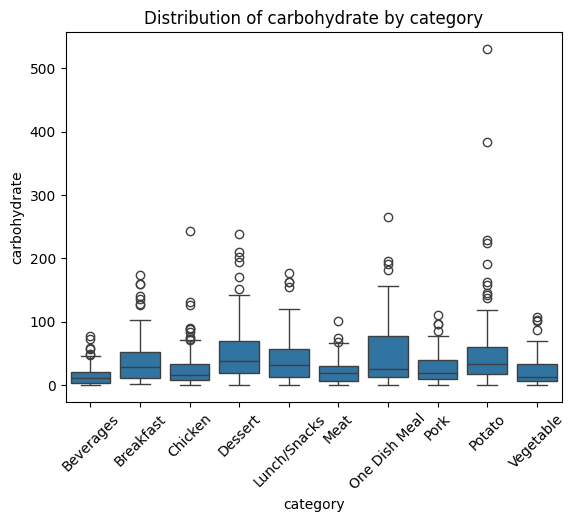

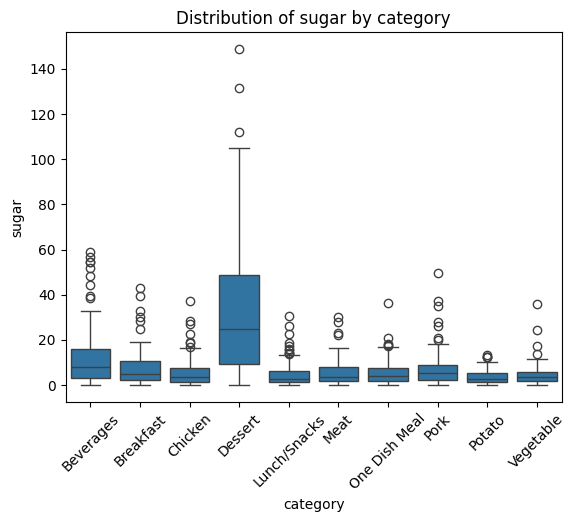

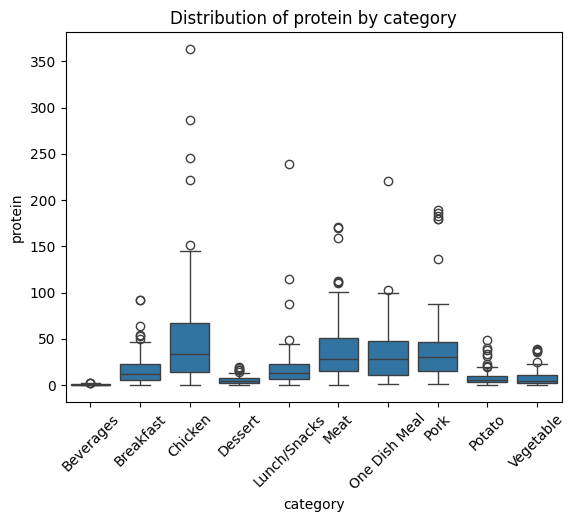

In [17]:
for v in vars:
    sns.boxplot(data=df, y=v, x='category')
    plt.xticks(rotation=45)
    plt.title('Distribution of {} by category'.format(v))
    plt.show()

## Model Fitting & Evaluation

Predicting whether a recipe is high traffic or not high traffic is a binary classification problem in machine learning.  I am choosing a Logistic Regression model because it's a common and useful model for solving binary classification problems.  Plus, this dataset is not vary large and the results for Logistic Regression are more interpretable than other, more complex models.  For a comparison model, I will choose the Decision Tree classification model because it is another easy-to-interpret model. 

To evaluate the models, since we need to confirm that we can be accurate in our predictions at least 80% of the time, I am choosing Accuracy as one of the metrics, with the other being ROC AUC (Receiver Operating Characteristic Area Under the Curve).  Accuracy measures how many correct predictions the model made from all observations. The ROC curve plots the model's true positive rate on the y-axis and false positive rate on the x-axis, creating a curve, and the area under the curve (AUC) ranges from 0 to 1, with 1 being the best possible outcome.

## Prepare Data for Modelling

I'm using calories, carbohydrate, sugar, protein, category, and servings as features, with high_traffic being the target variable.  To prepare the data for modelling, I will make the following changes:

* Convert the category and target variables into numeric features.
* Split the data into a training set and a test set.
* As part of the pipeline, use a power transformation on calories, carbohydrate, sugar, and protein to make their distributions more normal.

In [18]:
# Dummy encode the category and high_traffic columns
df = pd.get_dummies(df, columns=['category', 'high_traffic'],
                    prefix=['c', 'h'])

In [19]:
# drop one column from each set of encoded columns
df.drop(['c_Beverages', 'h_Not High'], axis=1, inplace=True)

In [20]:
# split dataset into features and target
X = df.drop('h_High', axis=1)
y = df['h_High']

In [21]:
# split data into train and test sets
SEED = 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=SEED,
                                                    stratify=y)

## Logistic Regression Model

In [22]:
# create pipeline for logistic regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

steps = [('pt', PowerTransformer()),
         ('log_reg', LogisticRegression(random_state=SEED))]

pipeline = Pipeline(steps)

# fit and transform data
pipeline.fit(X_train, y_train)

print("Accuracy is {}".format(pipeline.score(X_test, y_test)))

Accuracy is 0.8185654008438819


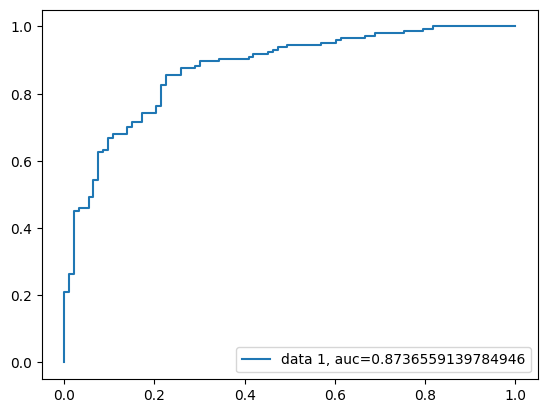

ROC AUC is 0.8736559139784946


In [23]:
# visualize roc and calculate roc auc
from sklearn import metrics

classifier = pipeline.named_steps['log_reg']

y_pred_proba = pipeline.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.show()

print("ROC AUC is {}".format(auc))

Finding the feature importance

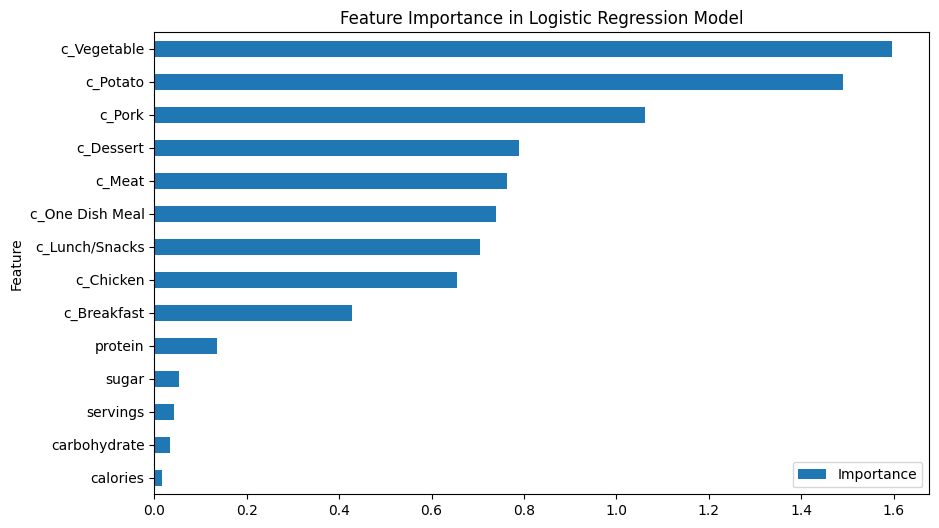

In [24]:
# evaluate feature importance
classifier = pipeline.named_steps['log_reg']

coefficients = classifier.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': np.abs(coefficients)})\
                                   .sort_values('Importance')

feature_importance.plot(x='Feature', y='Importance',
                        kind='barh', figsize=(10, 6))

plt.title('Feature Importance in Logistic Regression Model')
plt.legend(loc=4)

plt.show()

## Decision Tree Classification Model

In [25]:
# create pipeline for decision tree classification
from sklearn.tree import DecisionTreeClassifier

steps_dt = [('pt', PowerTransformer()),
            ('dt', DecisionTreeClassifier(max_depth=3, random_state=SEED))]

pipeline_dt = Pipeline(steps_dt)

# fit and transform data
pipeline_dt.fit(X_train, y_train)

print("Accuracy is {}".format(pipeline_dt.score(X_test, y_test)))

Accuracy is 0.810126582278481


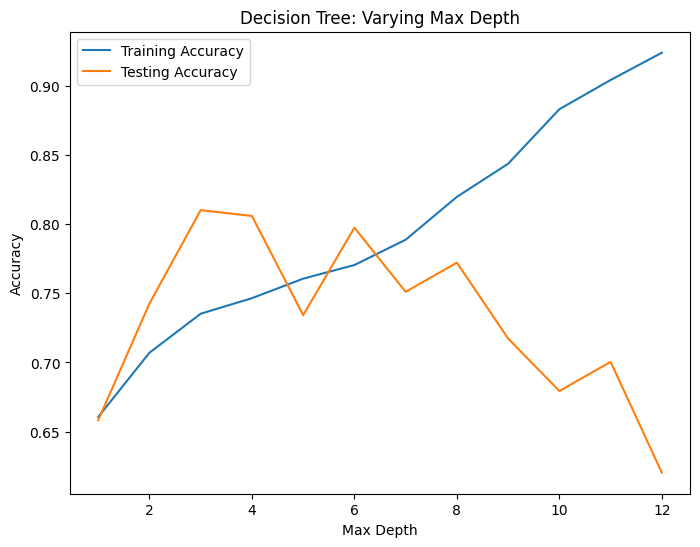

In [26]:
# find best max depth

train_accuracies = {}
test_accuracies = {}

max_depths = np.arange(1, 13)

for depths in max_depths:
    dt2 = DecisionTreeClassifier(max_depth=depths)
    dt2.fit(X_train, y_train)
    train_accuracies[depths] = dt2.score(X_train, y_train)
    test_accuracies[depths] = dt2.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title('Decision Tree: Varying Max Depth')

plt.plot(max_depths, train_accuracies.values(), label='Training Accuracy')
plt.plot(max_depths, test_accuracies.values(), label='Testing Accuracy')

plt.legend()

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.show()

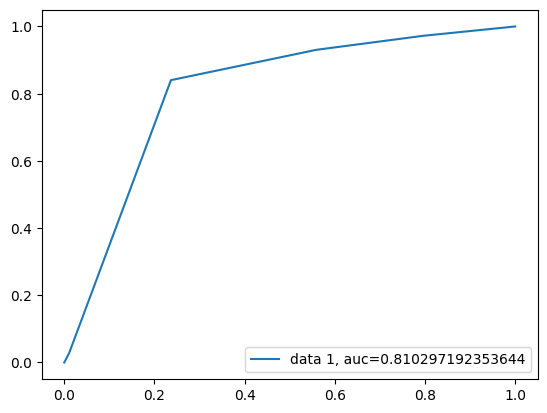

ROC AUC is 0.810297192353644


In [27]:
# visualize roc and calculate roc auc
y_pred_proba_dt = pipeline_dt.predict_proba(X_test)[::,1]

fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, y_pred_proba_dt)

auc_dt = metrics.roc_auc_score(y_test, y_pred_proba_dt)

plt.plot(fpr_dt, tpr_dt, label="data 1, auc="+str(auc_dt))
plt.legend(loc=4)

plt.show()

print("ROC AUC is {}".format(auc_dt))

Finding feature importance

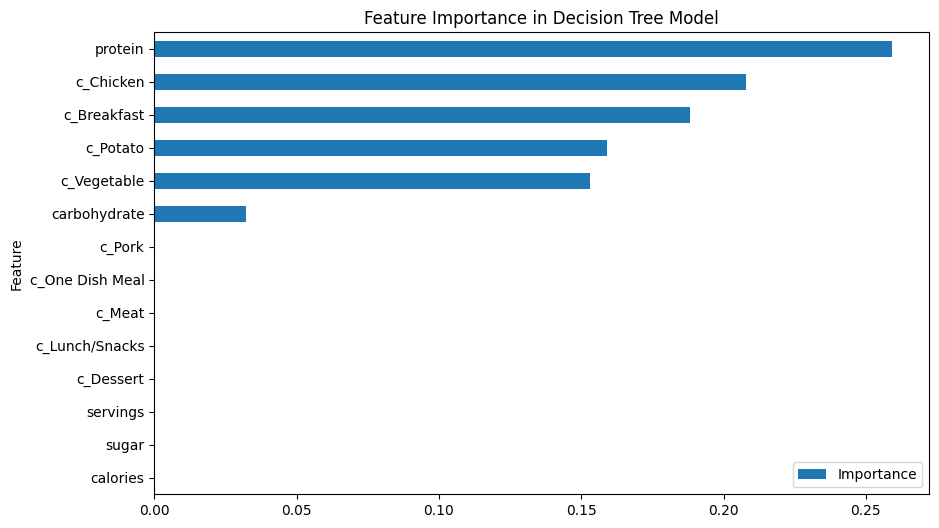

In [28]:
# evaluate feature importance
classifier_dt = pipeline_dt.named_steps['dt']

coefficients_dt = classifier_dt.feature_importances_

feature_importance_dt = pd.DataFrame({'Feature': X.columns,
                                   'Importance': np.abs(coefficients_dt)})\
                                   .sort_values('Importance')

feature_importance_dt.plot(x='Feature', y='Importance',
                           kind='barh', figsize=(10, 6))

plt.title('Feature Importance in Decision Tree Model')
plt.legend(loc=4)

plt.show()

## Results

The accuracy for the Logistic Regression model is about 0.82, while the accuracy for the Decision Tree model is about 0.81.  While both models exceed our goal of being able to correctly predict high traffic recipes 80% of the time, **the Logistic Regression model is slightly more accurate than the Decision Tree model**.  

Additionally, the ROC AUC for the Logistic Regression model is about 0.87, while the ROC AUC for the Decision Tree model is about 0.81, so **the Logistic Regression model is better at distinguishing between high traffic and non-high traffic recipes**.

## Business Metric

The business wants to be able to correctly predict high traffic recipes 80% of the time.  Therefore, I propose we consider using accuracy score at 80% or above as a KPI to compare the two models.  The higher the percentage, the better the model is at predicting which recipes are high traffic.  The Logistic Regression model's accuracy score is around 82%, while the Decision Tree Classifier model is about 81%.

## Recommendations

To ease the manual work of the product manager, we can plan to deploy this Logistic Regression model into production.  By implementing this model, we will be able to predict which recipes are high traffic at least 80% of the time.  This will help automate the process of choosing which recipes are featured on the home page, thus freeing up the product manager's time for other tasks.  I recommend doing the following to ensure the model can be deployed and improved upon in the future:
1. Test the model over the next month and see if it correctly predicts which recipes our product manager chooses to feature are high traffic.
2. Identify where there are errors and fix to improve accuracy.
3. Fully deploy the model into our website such that recipes are automatically chosen for being featured on our homepage.
4. Continuously improve the model by collecting data on high traffic recipes, create new features, and continue to tune parameters in order to improve accuracy and thus, drive more traffic to our website.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation